#CRISP-DM Methodology on the Bank Dataset 🌟

#1. Business Understanding 📚
The goal of our analysis is to understand the factors that influence whether a bank's client subscribes to a term deposit. By understanding these factors, the bank can optimize its marketing strategies, target the right individuals, and improve subscription rates.



In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 36.0 MB/s eta

#2. Data Understanding 🕵️
First, let's import the necessary libraries and load our dataset to get an initial understanding:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from google.colab import files

uploaded = files.upload()


Saving bank.csv to bank.csv


In [9]:
# Load the dataset with specified delimiters and quote character
data = pd.read_csv('bank.csv', delimiter=';', quotechar='"')

data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


#3. Data Preparation 🧹
Handling Missing Values:
First, let's check for any missing values:

In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#4. Data Visualization 🎨

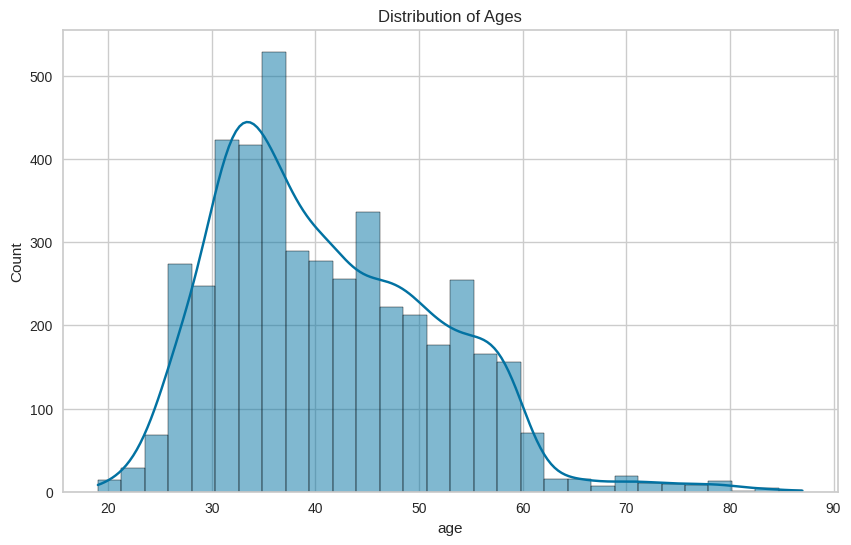

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.show()

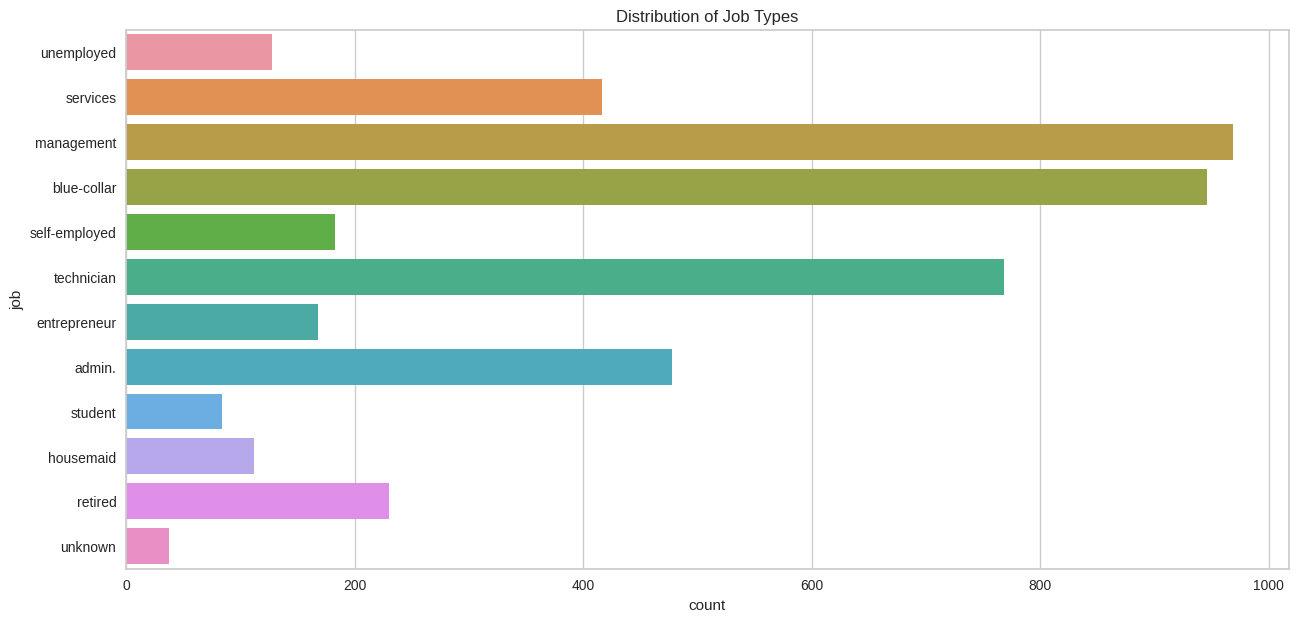

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(y=data['job'])
plt.title('Distribution of Job Types')
plt.show()

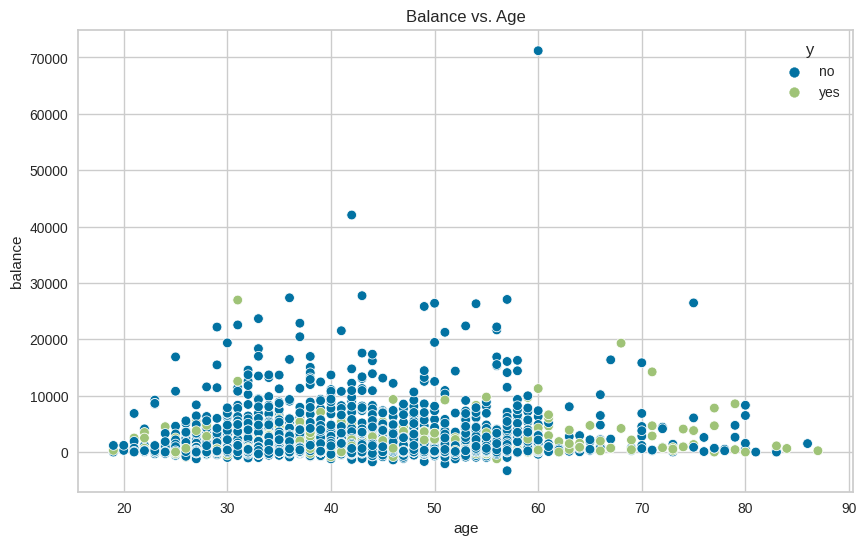

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['age'], y=data['balance'], hue=data['y'])
plt.title('Balance vs. Age')
plt.show()

#5. Data Modeling 🛠️
Set up the PyCaret environment and compare various models:

In [18]:
model_setup = setup(data, target = 'y', session_id=123)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(4521, 17)"
5,Transformed data shape,"(4521, 49)"
6,Transformed train set shape,"(3164, 49)"
7,Transformed test set shape,"(1357, 49)"
8,Ordinal features,3
9,Numeric features,7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9027,0.9130,0.3869,0.6245,0.4758,0.4258,0.4415,4.6780
lda,Linear Discriminant Analysis,0.8985,0.8887,0.4138,0.5877,0.4841,0.4299,0.4388,0.4770
lr,Logistic Regression,0.8979,0.8826,0.2851,0.6300,0.3904,0.3435,0.3768,1.7570
rf,Random Forest Classifier,0.8979,0.8975,0.2227,0.6847,0.3323,0.2927,0.3486,1.1010
gbc,Gradient Boosting Classifier,0.8964,0.9037,0.3571,0.5790,0.4396,0.3867,0.4012,0.9500
lightgbm,Light Gradient Boosting Machine,0.8960,0.8978,0.3677,0.5781,0.4465,0.3928,0.4064,2.2390
xgboost,Extreme Gradient Boosting,0.8944,0.8902,0.3895,0.5583,0.4577,0.4016,0.4101,1.1010
ada,Ada Boost Classifier,0.8935,0.8864,0.3429,0.5605,0.4236,0.3691,0.3834,0.4090
ridge,Ridge Classifier,0.8932,0.0000,0.2163,0.6084,0.3129,0.2702,0.3146,0.2230
et,Extra Trees Classifier,0.8925,0.8718,0.2116,0.6025,0.3087,0.2657,0.3104,0.6440


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [23]:
# Display the metrics
print(best_model)

#6. Evaluation 📊
Evaluate the best model's performance:

In [19]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##Saving the best model

In [20]:
final_model = finalize_model(best_model)
save_model(final_model, 'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep...
                                     include=['job', 'marital', 'education',
                                              'contact', 'month', 'poutcome'],
      